In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

## READ CSV FILE

In [2]:
df_stations=pd.read_csv("stations.csv")
df_stations

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
...,...,...,...,...,...
225,WB010,"Jadavpur, Kolkata - WBPCB",Kolkata,West Bengal,Active
226,WB011,"Rabindra Bharati University, Kolkata - WBPCB",Kolkata,West Bengal,Active
227,WB012,"Rabindra Sarobar, Kolkata - WBPCB",Kolkata,West Bengal,Active
228,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active


### INFO about DataFrame 

In [3]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
 4   Status       133 non-null    object
dtypes: object(5)
memory usage: 9.1+ KB


###  percentage of null values in given dataset

In [4]:
df_stations.isnull().sum()

StationId       0
StationName     0
City            0
State           0
Status         97
dtype: int64

In [5]:
df_stations["Status"].value_counts()

Active      131
Inactive      2
Name: Status, dtype: int64

### Dropped the not needed column status

In [6]:
df_stations.drop(columns=["Status"], axis=1, inplace=True)

In [7]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StationId    230 non-null    object
 1   StationName  230 non-null    object
 2   City         230 non-null    object
 3   State        230 non-null    object
dtypes: object(4)
memory usage: 7.3+ KB


### second dataset

In [8]:
df_station_hour=pd.read_csv("station_hour.csv")
df_station_hour

C:\Users\Miles\AppData\Local\Temp\ipykernel_23660\476913562.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_station_hour=pd.read_csv("station_hour.csv")


,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,8.50,0.10,11.85,126.40,0.10,6.10,0.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,9.77,0.10,13.17,117.12,0.10,6.25,0.15,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,12.02,0.10,12.08,98.98,0.20,5.98,0.18,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,11.58,0.10,10.47,112.20,0.20,6.72,0.10,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,12.03,0.10,9.12,106.35,0.20,5.75,0.08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,31.25,0.80,9.40,17.24,2.56,11.57,NaN,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,30.66,0.56,4.91,17.46,3.49,12.29,NaN,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,30.73,0.61,3.81,17.24,1.83,8.88,NaN,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,29.61,0.65,3.44,12.74,1.40,8.43,NaN,59.0,Satisfactory


In [9]:
df_station_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2589083 entries, 0 to 2589082
Data columns (total 16 columns):
 #   Column      Dtype  
---  ------      -----  
 0   StationId   object 
 1   Datetime    object 
 2   PM2.5       float64
 3   PM10        float64
 4   NO          float64
 5   NO2         float64
 6   NOx         float64
 7   NH3         float64
 8   CO          float64
 9   SO2         float64
 10  O3          float64
 11  Benzene     float64
 12  Toluene     float64
 13  Xylene      float64
 14  AQI         float64
 15  AQI_Bucket  object 
dtypes: float64(13), object(3)
memory usage: 316.1+ MB


In [60]:
df_station_hour.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'Year'],
      dtype='object')

In [10]:
df_station_hour.isnull().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
NH3           1236618
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
Xylene        2075104
AQI            570190
AQI_Bucket     570190
dtype: int64

In [11]:
perc_missing=df_station_hour.isnull().sum()*100/len(df_station_hour)
perc_missing

StationId      0.000000
Datetime       0.000000
PM2.5         25.016154
PM10          43.229669
NO            21.386375
NO2           20.430902
NOx           18.956828
NH3           47.762779
CO            19.284897
SO2           28.687261
O3            28.039773
Benzene       33.277380
Toluene       40.260046
Xylene        80.148222
AQI           22.022855
AQI_Bucket    22.022855
dtype: float64

In [12]:
df_station_hour.drop(columns="Xylene",inplace=True)

In [13]:
df_station_hour.drop(columns="NH3",inplace=True)

In [14]:
df_station_hour

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,0.10,11.85,126.40,0.10,6.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,0.10,13.17,117.12,0.10,6.25,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,0.10,12.08,98.98,0.20,5.98,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,0.10,10.47,112.20,0.20,6.72,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,0.10,9.12,106.35,0.20,5.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,0.80,9.40,17.24,2.56,11.57,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,0.56,4.91,17.46,3.49,12.29,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,0.61,3.81,17.24,1.83,8.88,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,0.65,3.44,12.74,1.40,8.43,59.0,Satisfactory


In [15]:
df_station_hour

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,0.10,11.85,126.40,0.10,6.10,NaN,NaN
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,0.10,13.17,117.12,0.10,6.25,NaN,NaN
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,0.10,12.08,98.98,0.20,5.98,NaN,NaN
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,0.10,10.47,112.20,0.20,6.72,NaN,NaN
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,0.10,9.12,106.35,0.20,5.75,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,0.80,9.40,17.24,2.56,11.57,59.0,Satisfactory
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,0.56,4.91,17.46,3.49,12.29,59.0,Satisfactory
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,0.61,3.81,17.24,1.83,8.88,59.0,Satisfactory
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,0.65,3.44,12.74,1.40,8.43,59.0,Satisfactory


In [16]:
df_station_hour.columns

Index(['StationId', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

### Checking for null values

In [17]:
df_station_hour.isnull().sum()

StationId           0
Datetime            0
PM2.5          647689
PM10          1119252
NO             553711
NO2            528973
NOx            490808
CO             499302
SO2            742737
O3             725973
Benzene        861579
Toluene       1042366
AQI            570190
AQI_Bucket     570190
dtype: int64

In [18]:
df_station_hour["Datetime"]=pd.to_datetime(df_station_hour["Datetime"])
df_station_hour["Year"]=df_station_hour["Datetime"].dt.year

In [19]:
df_station_hour

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,AP001,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,0.10,11.85,126.40,0.10,6.10,NaN,NaN,2017
1,AP001,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,0.10,13.17,117.12,0.10,6.25,NaN,NaN,2017
2,AP001,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,0.10,12.08,98.98,0.20,5.98,NaN,NaN,2017
3,AP001,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,0.10,10.47,112.20,0.20,6.72,NaN,NaN,2017
4,AP001,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,0.10,9.12,106.35,0.20,5.75,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,0.80,9.40,17.24,2.56,11.57,59.0,Satisfactory,2020
2589079,WB013,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,0.56,4.91,17.46,3.49,12.29,59.0,Satisfactory,2020
2589080,WB013,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,0.61,3.81,17.24,1.83,8.88,59.0,Satisfactory,2020
2589081,WB013,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,0.65,3.44,12.74,1.40,8.43,59.0,Satisfactory,2020


In [20]:
df_station_hour["Year"].value_counts()

2019    776778
2018    615388
2020    462090
2017    322686
2016    234909
2015    177232
Name: Year, dtype: int64

In [21]:
df_station_hour["AQI"].value_counts()

102.0     16729
104.0     15664
101.0     15486
106.0     14777
100.0     14516
          ...  
2361.0        1
2338.0        1
2243.0        1
1298.0        1
1031.0        1
Name: AQI, Length: 1601, dtype: int64

In [22]:
df_station_hour.groupby(["Year"])["AQI"].mean()

Year
2015    222.042349
2016    209.116705
2017    204.084488
2018    200.259560
2019    175.686005
2020    135.884670
Name: AQI, dtype: float64

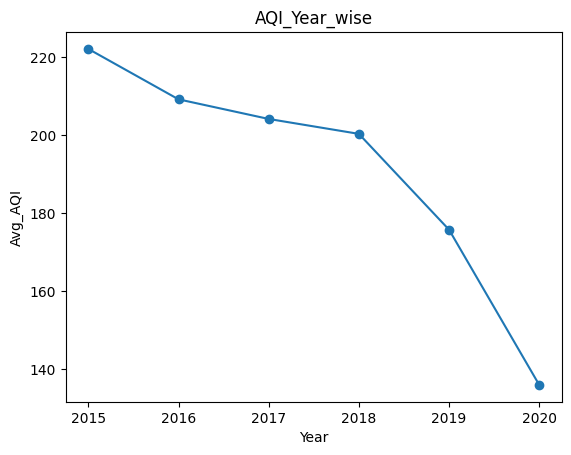

In [23]:
Year = [2015,   2016 , 2017, 2018, 2019  ,2020  ]
aqi = [222.042349, 209.116705, 204.084488, 200.259560, 175.686005,  135.884670]

plt.plot( Year, aqi, marker = 'o')
plt.title("AQI_Year_wise")
plt.xlabel("Year")
plt.ylabel("Avg_AQI")
plt.savefig("AQI_Year_wise.png")
plt.show()

### Unique values 

In [24]:
df_station_hour["AQI_Bucket"].unique()

array([nan, 'Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good',
       'Severe'], dtype=object)

In [25]:
df_station_hour["AQI_Bucket"].value_counts()

Moderate        675008
Satisfactory    530164
Very Poor       301150
Poor            239990
Good            152113
Severe          120468
Name: AQI_Bucket, dtype: int64

### Pie plot for AQI CATEGORIES

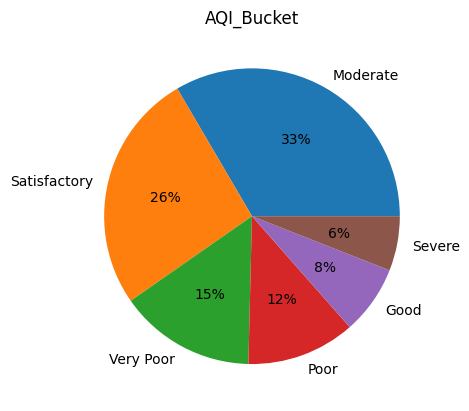

In [26]:
slices = [675008,530164,301150 , 239990,152113, 120468]
labels = ['Moderate',
'Satisfactory',
'Very Poor' ,
'Poor',
'Good'  ,
'Severe']

plt.pie(slices , labels = labels, autopct = '%1.0f%%')
plt.title('AQI_Bucket')
plt.savefig("AQI_Bucket.png")

plt.show()

In [27]:
df = pd.merge(left = df_stations, right =df_station_hour , on = 'StationId')
df

,StationId,StationName,City,State,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,2017-11-24 17:00:00,60.50,98.00,2.35,30.80,18.25,0.10,11.85,126.40,0.10,6.10,NaN,NaN,2017
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,2017-11-24 18:00:00,65.50,111.25,2.70,24.20,15.07,0.10,13.17,117.12,0.10,6.25,NaN,NaN,2017
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,2017-11-24 19:00:00,80.00,132.00,2.10,25.18,15.15,0.10,12.08,98.98,0.20,5.98,NaN,NaN,2017
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,2017-11-24 20:00:00,81.50,133.25,1.95,16.25,10.23,0.10,10.47,112.20,0.20,6.72,NaN,NaN,2017
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,2017-11-24 21:00:00,75.25,116.00,1.43,17.48,10.43,0.10,9.12,106.35,0.20,5.75,NaN,NaN,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589078,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,2020-06-30 20:00:00,15.55,47.80,7.27,35.08,42.38,0.80,9.40,17.24,2.56,11.57,59.0,Satisfactory,2020
2589079,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,2020-06-30 21:00:00,15.23,42.30,6.10,26.78,32.85,0.56,4.91,17.46,3.49,12.29,59.0,Satisfactory,2020
2589080,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,2020-06-30 22:00:00,11.40,40.95,6.58,19.53,26.12,0.61,3.81,17.24,1.83,8.88,59.0,Satisfactory,2020
2589081,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,2020-06-30 23:00:00,9.25,34.33,9.17,21.85,31.00,0.65,3.44,12.74,1.40,8.43,59.0,Satisfactory,2020


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589083 entries, 0 to 2589082
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   StationId    object        
 1   StationName  object        
 2   City         object        
 3   State        object        
 4   Datetime     datetime64[ns]
 5   PM2.5        float64       
 6   PM10         float64       
 7   NO           float64       
 8   NO2          float64       
 9   NOx          float64       
 10  CO           float64       
 11  SO2          float64       
 12  O3           float64       
 13  Benzene      float64       
 14  Toluene      float64       
 15  AQI          float64       
 16  AQI_Bucket   object        
 17  Year         int64         
dtypes: datetime64[ns](1), float64(11), int64(1), object(5)
memory usage: 375.3+ MB


In [29]:
df.isna().sum()

StationId            0
StationName          0
City                 0
State                0
Datetime             0
PM2.5           647689
PM10           1119252
NO              553711
NO2             528973
NOx             490808
CO              499302
SO2             742737
O3              725973
Benzene         861579
Toluene        1042366
AQI             570190
AQI_Bucket      570190
Year                 0
dtype: int64

### City wise AQI RANGE

In [30]:
df_mean=df.groupby('State')["AQI"].mean().sort_values(ascending=False).round(0).reset_index()
df_mean

,State,AQI
0,Gujarat,454.0
1,Delhi,239.0
2,Uttar Pradesh,217.0
3,Bihar,213.0
4,Haryana,211.0
5,Odisha,164.0
6,Jharkhand,160.0
7,Assam,140.0
8,Rajasthan,135.0
9,Madhya Pradesh,133.0


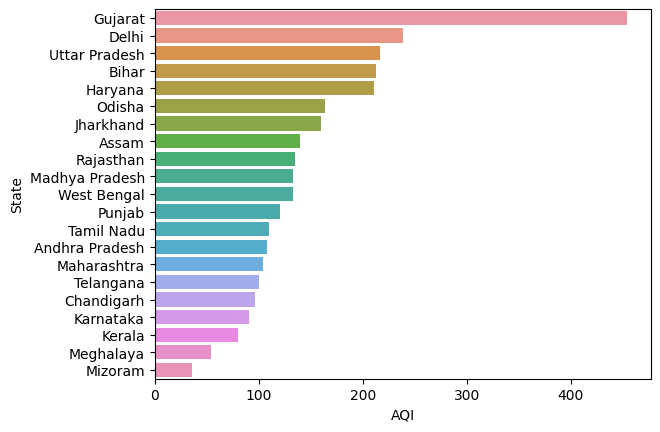

In [31]:
sns.barplot(data=df_mean,
           y="State",
           x="AQI")
plt.savefig("AQI.png")

In [32]:
# Top 5  polluted
top_State=pd.DataFrame(df.groupby(["State"])["AQI"].mean().sort_values(ascending=False)[0:5])
top_State

,AQI
State,
Gujarat,453.542641
Delhi,238.928784
Uttar Pradesh,217.011029
Bihar,212.908110
Haryana,210.780209


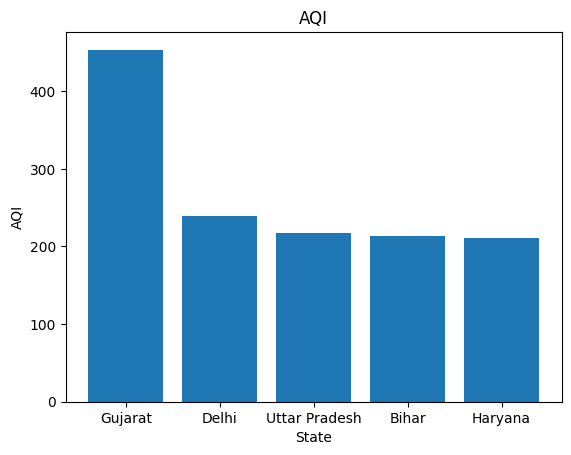

<Figure size 640x480 with 0 Axes>

In [33]:
labels = ['Gujarat' , 'Delhi', 'Uttar Pradesh' ,'Bihar', 'Haryana'] 
aqi =   [453.542641, 238.928784, 217.011029
, 212.908110,210.780209]
    

plt.bar( labels, aqi)
plt.title("AQI")
plt.xlabel("State")
plt.ylabel("AQI")
plt.show()
plt.savefig("AQI_Top_city.png")


In [34]:
# lower 5  polluted
low_State=pd.DataFrame(df.groupby(["State"])["AQI"].mean().sort_values(ascending=True)[0:5])
low_State

,AQI
State,
Mizoram,35.543908
Meghalaya,54.346073
Kerala,80.052828
Karnataka,91.375323
Chandigarh,96.924869


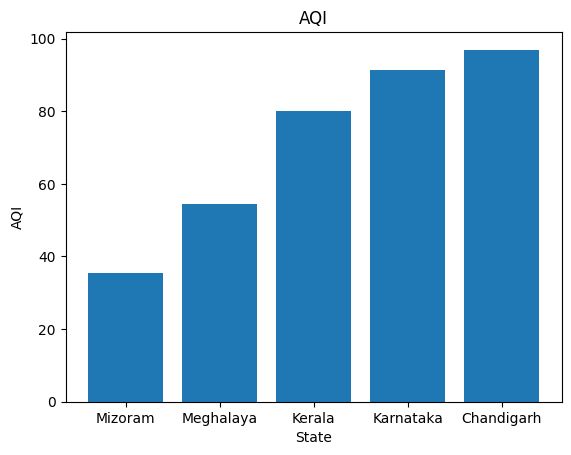

<Figure size 640x480 with 0 Axes>

In [35]:
labels = ['Mizoram' , 'Meghalaya', 'Kerala' ,'Karnataka', 'Chandigarh'] 
aqi =   [35.543908, 54.346073, 80.052828, 91.375323,96.924869]
    

plt.bar( labels, aqi)
plt.title("AQI")
plt.xlabel("State")
plt.ylabel("AQI")
plt.show()
plt.savefig("AQI_lower_city.png")


In [36]:
df_city_day=pd.read_csv("city_day.csv")
df_city_day

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [37]:
df_city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [38]:
df_city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

C:\Users\Miles\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Miles\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\Miles\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Miles\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\Miles\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\Miles\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctio

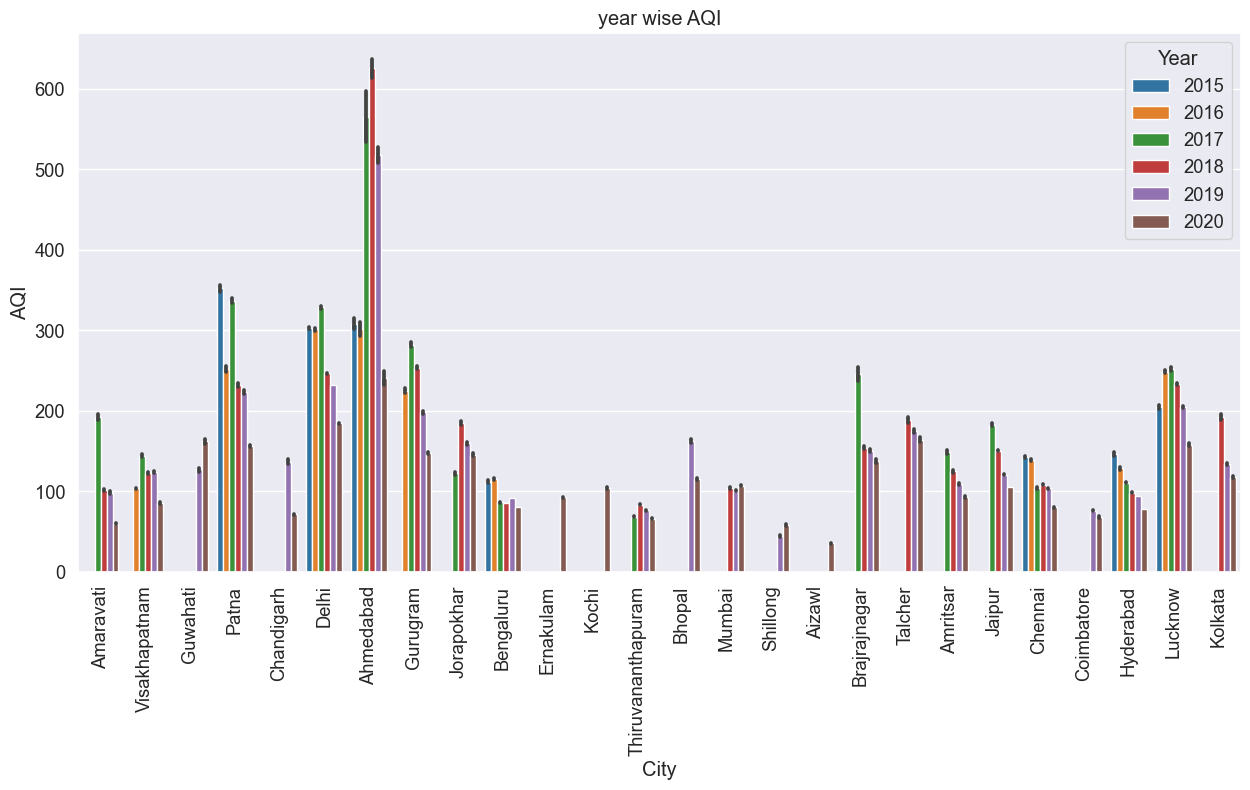

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(15,7))
sns.set(font_scale=1.2)
sns.barplot(x="City", y="AQI", data=df, hue="Year", palette="tab10").set(title='year wise AQI')
plt.xticks(rotation=90)
plt.show()
plt.savefig("year wise AQI.png")


### city hour dataset

In [40]:
df_city_hour=pd.read_csv("city_hour.csv")
df_city_hour

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [41]:
df_city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [42]:
df_city_hour.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [43]:
df_city_hour.drop(columns=["Xylene","NH3"], axis=1, inplace=True)

In [44]:
df_city_hour["Datetime"]=pd.to_datetime(df_city_hour["Datetime"])

df_city_hour["Year"]=df_city_hour["Datetime"].dt.year
df_city_hour["Month"]=df_city_hour["Datetime"].dt.month
df_city_hour["hour"]=df_city_hour["Datetime"].dt.hour
df_city_hour["Day"]=df_city_hour["Datetime"].dt.day



In [45]:
df_city_hour

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,hour,Day
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,1.00,122.07,NaN,0.0,0.0,NaN,NaN,2015,1,1,1
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,0.02,85.90,NaN,0.0,0.0,NaN,NaN,2015,1,2,1
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,0.08,52.83,NaN,0.0,0.0,NaN,NaN,2015,1,3,1
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,0.30,39.53,153.58,0.0,0.0,NaN,NaN,2015,1,4,1
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,0.12,32.63,NaN,0.0,0.0,NaN,NaN,2015,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,0.62,NaN,27.75,NaN,NaN,51.0,Satisfactory,2020,6,20,30
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,0.76,2.02,25.58,NaN,NaN,51.0,Satisfactory,2020,6,21,30
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,0.58,1.77,26.15,NaN,NaN,50.0,Good,2020,6,22,30
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,0.49,0.75,15.82,NaN,NaN,50.0,Good,2020,6,23,30


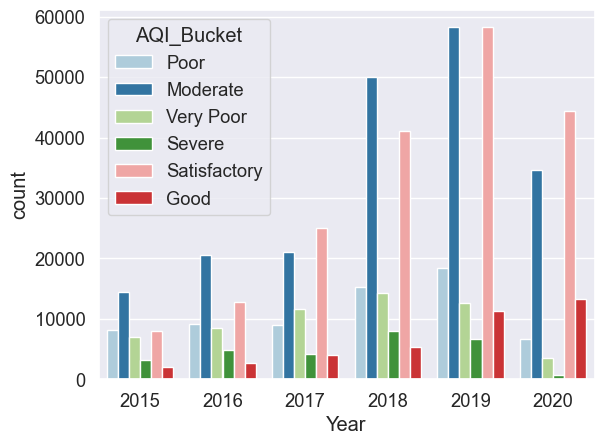

In [46]:
sns.countplot(data=df_city_hour,
             hue="AQI_Bucket",
             x="Year",
             palette="Paired")
plt.savefig("year.png")


In [73]:
def month_wise(Month):
    if Month <=2 or Month>=11:
        Season_label="Winter"
    elif Month >=3 and Month<6:
        Season_label="Summer"
    else:
        Season_label="Monsoon"
    return Season_label

In [74]:
df_city_hour["month_wise"]=df_city_hour["Month"].apply(month_wise)
df_city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,hour,Day,month_wise
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,1.00,122.07,NaN,0.0,0.0,NaN,NaN,2015,1,1,1,Winter
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,0.02,85.90,NaN,0.0,0.0,NaN,NaN,2015,1,2,1,Winter
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,0.08,52.83,NaN,0.0,0.0,NaN,NaN,2015,1,3,1,Winter
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,0.30,39.53,153.58,0.0,0.0,NaN,NaN,2015,1,4,1,Winter
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,0.12,32.63,NaN,0.0,0.0,NaN,NaN,2015,1,5,1,Winter


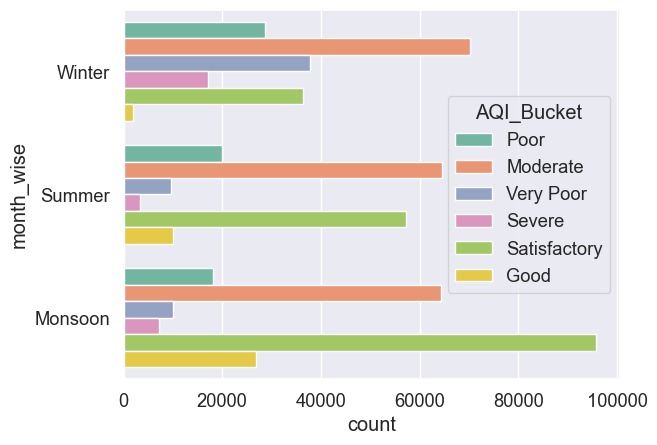

In [75]:
sns.countplot(data=df_city_hour,
             hue="AQI_Bucket",
             y="month_wise",
             palette="Set2")
plt.savefig("month_wise.png")

### Checking for pollutants range for each year

In [50]:
df_city_hour.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'Year', 'Month',
       'hour', 'Day', 'month_wise'],
      dtype='object')

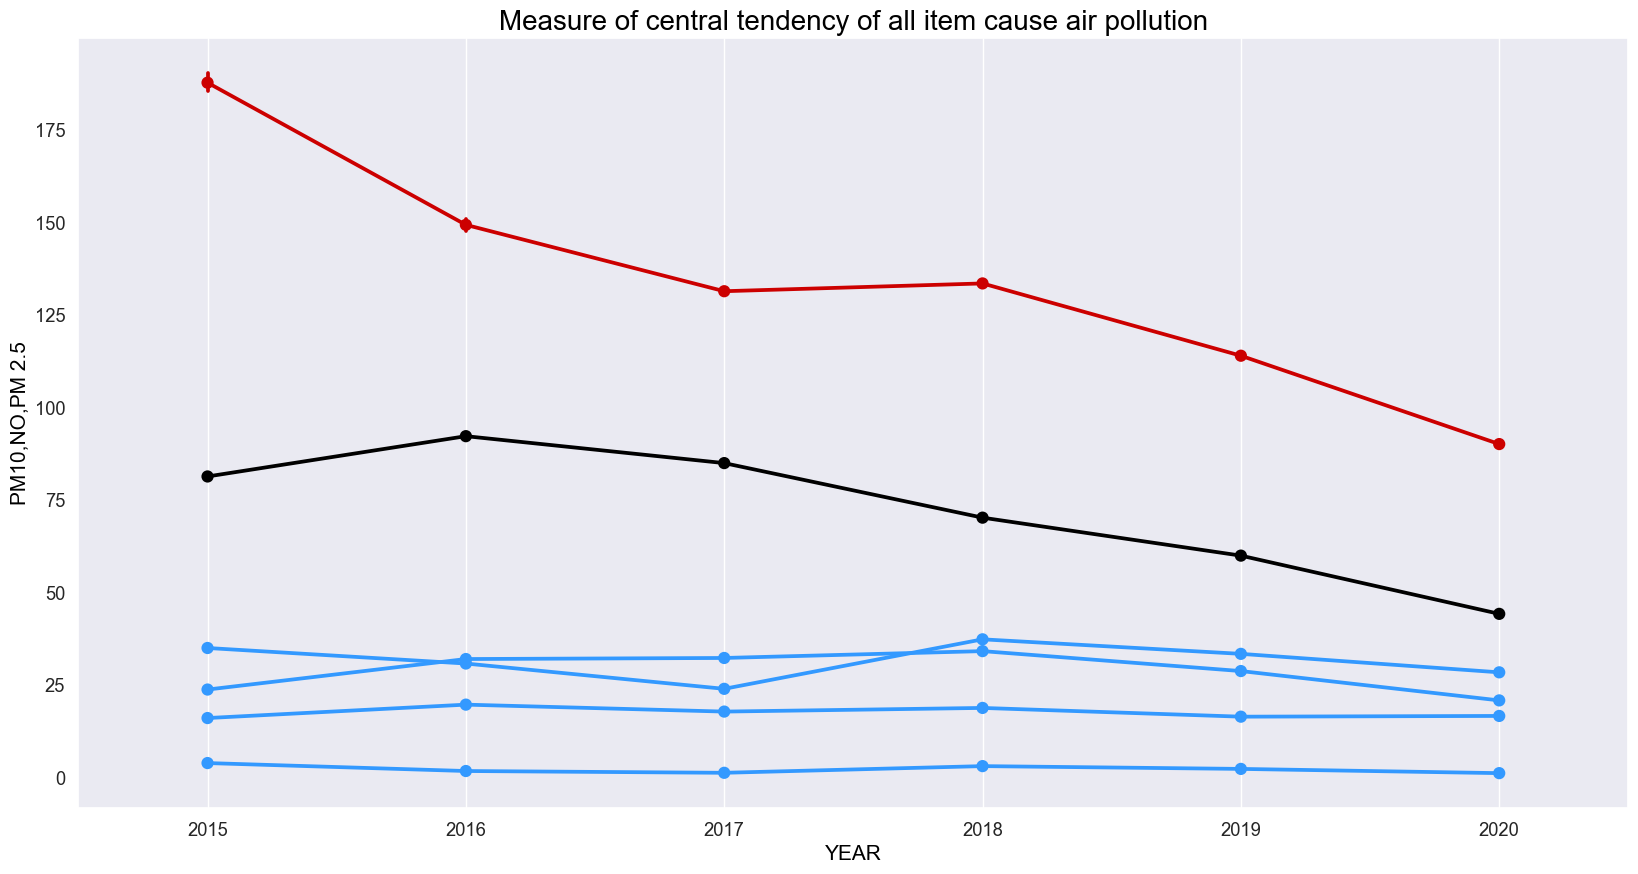

<Figure size 640x480 with 0 Axes>

In [57]:
plt.subplots(figsize =(20,10)) 
 
sns.pointplot(x='Year',y='PM2.5',data=df_city_hour,color='black') 
sns.pointplot(x='Year',y='PM10',data=df_city_hour,color='#CC0000') 
sns.pointplot(x='Year',y='NO',data=df_city_hour,color='#3399FF') 
sns.pointplot(x='Year',y='NO2',data=df_city_hour,color='#3399FF') 
sns.pointplot(x='Year',y='NOx',data=df_city_hour,color='#3399FF') 
sns.pointplot(x='Year',y='CO',data=df_city_hour,color='#3399FF') 
 
 
 
plt.xlabel('YEAR',fontsize = 15,color='black') 
plt.ylabel('PM10,NO,PM 2.5',fontsize = 15,color='black') 
plt.title('Measure of central tendency of all item cause air pollution',fontsize = 20,color='black') 
plt.grid() 
plt.show()
plt.savefig("Measure of central tendency .png")

### focusing on one city

In [52]:
df_Bengaluru=df_city_hour[df_city_hour["City"]=="Bengaluru"]
df_Bengaluru

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,hour,Day,month_wise
102925,Bengaluru,2015-01-01 01:00:00,NaN,NaN,2.04,12.40,7.58,0.19,4.05,12.41,0.56,3.43,NaN,NaN,2015,1,1,1,Winter
102926,Bengaluru,2015-01-01 02:00:00,NaN,NaN,2.20,12.11,7.54,0.21,4.23,12.13,NaN,4.54,NaN,NaN,2015,1,2,1,Winter
102927,Bengaluru,2015-01-01 03:00:00,NaN,NaN,1.66,10.82,6.52,0.30,4.28,13.13,NaN,4.20,NaN,NaN,2015,1,3,1,Winter
102928,Bengaluru,2015-01-01 04:00:00,NaN,NaN,1.92,10.32,6.46,0.13,4.14,11.82,NaN,4.63,NaN,NaN,2015,1,4,1,Winter
102929,Bengaluru,2015-01-01 05:00:00,NaN,NaN,1.94,9.82,6.22,0.15,4.26,10.31,NaN,3.91,NaN,NaN,2015,1,5,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151112,Bengaluru,2020-06-30 20:00:00,24.14,40.04,4.78,18.31,19.23,0.62,6.79,19.62,0.30,1.04,49.0,Good,2020,6,20,30,Summer
151113,Bengaluru,2020-06-30 21:00:00,25.14,41.29,4.22,16.05,16.40,0.61,6.32,19.50,0.34,0.86,49.0,Good,2020,6,21,30,Summer
151114,Bengaluru,2020-06-30 22:00:00,18.35,37.11,3.95,14.46,14.98,0.85,6.43,17.47,0.26,0.74,46.0,Good,2020,6,22,30,Summer
151115,Bengaluru,2020-06-30 23:00:00,16.60,33.62,3.89,14.00,14.92,0.61,6.44,16.23,0.22,0.79,43.0,Good,2020,6,23,30,Summer


In [53]:
df_Bengaluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48192 entries, 102925 to 151116
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        48192 non-null  object        
 1   Datetime    48192 non-null  datetime64[ns]
 2   PM2.5       43561 non-null  float64       
 3   PM10        37205 non-null  float64       
 4   NO          47569 non-null  float64       
 5   NO2         47572 non-null  float64       
 6   NOx         46104 non-null  float64       
 7   CO          43542 non-null  float64       
 8   SO2         47447 non-null  float64       
 9   O3          42956 non-null  float64       
 10  Benzene     38128 non-null  float64       
 11  Toluene     40993 non-null  float64       
 12  AQI         45497 non-null  float64       
 13  AQI_Bucket  45497 non-null  object        
 14  Year        48192 non-null  int64         
 15  Month       48192 non-null  int64         
 16  hour        4819

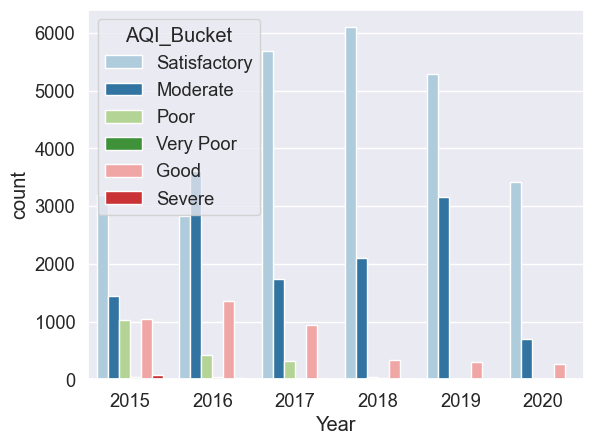

In [58]:
sns.countplot(data=df_Bengaluru,x="Year", hue="AQI_Bucket", palette="Paired")
plt.savefig("Bengaluru.png")
